In [1]:
#Importation des biblithèques
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
import numpy as np
from sklearn import neighbors

In [5]:
# X -> features, y -> label
df = pd.read_csv("jeu2Donne.csv")
x = df[df.columns[4:6]].values
y = df[df.columns[12:13]].values

In [13]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'


In [14]:
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    scoring=score,           # nombre de folds de validation croisée
    cv=5   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, np.ravel(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [15]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ))


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 9}
Résultats de la validation croisée :
accuracy = 0.587 (+/-0.081) for {'n_neighbors': 3}
accuracy = 0.582 (+/-0.031) for {'n_neighbors': 5}
accuracy = 0.577 (+/-0.050) for {'n_neighbors': 7}
accuracy = 0.603 (+/-0.059) for {'n_neighbors': 9}


Accuracy: 0.6
 


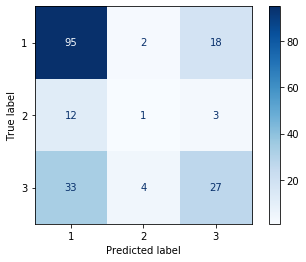

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt
y_pred = clf.predict(X_test_std)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(" ")
knn_predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
#print(cm)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues)
plt.show()